In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
cephasax_obdii_ds3_path = kagglehub.dataset_download('cephasax/obdii-ds3')

print('Data source import complete.')

/home/ahmad/anaconda3/envs/res_jup/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.


## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

There are 3 csv files in the current version of the dataset:


In [7]:
for dirname, _, filenames in os.walk('./obd2_dataset_1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./obd2_dataset_1/exp3_4drivers_1car_1route.xlsx
./obd2_dataset_1/exp1_14drivers_14cars_dailyRoutes.xlsx
./obd2_dataset_1/exp1_14drivers_14cars_dailyRoutes.csv
./obd2_dataset_1/exp3_4drivers_1car_1route.csv
./obd2_dataset_1/exp2_19drivers_1car_1route.xlsx
./obd2_dataset_1/exp2_19drivers_1car_1route.csv


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [16]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [22]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [19]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna() # drop rows with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/exp1_14drivers_14cars_dailyRoutes.csv

In [11]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# exp1_14drivers_14cars_dailyRoutes.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./obd2_dataset_1/exp1_14drivers_14cars_dailyRoutes.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'exp1_14drivers_14cars_dailyRoutes.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 33 columns


In [12]:
df1.isnull().sum()

TIMESTAMP                         0
MARK                              0
MODEL                             0
CAR_YEAR                          0
ENGINE_POWER                      0
AUTOMATIC                         0
VEHICLE_ID                        0
BAROMETRIC_PRESSURE(KPA)        181
ENGINE_COOLANT_TEMP             181
FUEL_LEVEL                      180
ENGINE_LOAD                     259
AMBIENT_AIR_TEMP                535
ENGINE_RPM                      258
INTAKE_MANIFOLD_PRESSURE        181
MAF                             258
LONG TERM FUEL TRIM BANK 2      822
FUEL_TYPE                         0
AIR_INTAKE_TEMP                 181
FUEL_PRESSURE                  1000
SPEED                             9
SHORT TERM FUEL TRIM BANK 2     822
SHORT TERM FUEL TRIM BANK 1     822
ENGINE_RUNTIME                  247
THROTTLE_POS                    179
DTC_NUMBER                        1
TROUBLE_CODES                  1000
TIMING_ADVANCE                  179
EQUIV_RATIO                 

In [13]:
cols = df1.columns
num_of_nan = df1.isnull().sum()
nice_cols = num_of_nan[num_of_nan[cols] < 500]
nice_cols = nice_cols.index
nice_cols

Index(['TIMESTAMP', 'MARK', 'MODEL', 'CAR_YEAR', 'ENGINE_POWER', 'AUTOMATIC',
       'VEHICLE_ID', 'BAROMETRIC_PRESSURE(KPA)', 'ENGINE_COOLANT_TEMP',
       'FUEL_LEVEL', 'ENGINE_LOAD', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE',
       'MAF', 'FUEL_TYPE', 'AIR_INTAKE_TEMP', 'SPEED', 'ENGINE_RUNTIME',
       'THROTTLE_POS', 'DTC_NUMBER', 'TIMING_ADVANCE', 'EQUIV_RATIO', 'MIN',
       'HOURS', 'DAYS_OF_WEEK', 'MONTHS', 'YEAR'],
      dtype='object')

In [14]:
df_without_na = df1[nice_cols]

Let's take a quick look at what the data looks like:

In [10]:
df1.head(5)

,TIMESTAMP,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,1502902504267,chevrolet,agile,2011,"1,4",n,car1,100.0,80.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13,16,2,8,2017
1,1502902512283,chevrolet,agile,2011,"1,4",n,car1,100.0,80.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13,16,2,8,2017
2,1502902520291,chevrolet,agile,2011,"1,4",n,car1,100.0,80.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"57,3%","1,0%",13,16,2,8,2017
3,1502902528300,chevrolet,agile,2011,"1,4",n,car1,100.0,80.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13,16,2,8,2017
4,1502902536320,chevrolet,agile,2011,"1,4",n,car1,100.0,80.0,"48,60%",...,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13,16,2,8,2017


Distribution graphs (histogram/bar graph) of sampled columns:

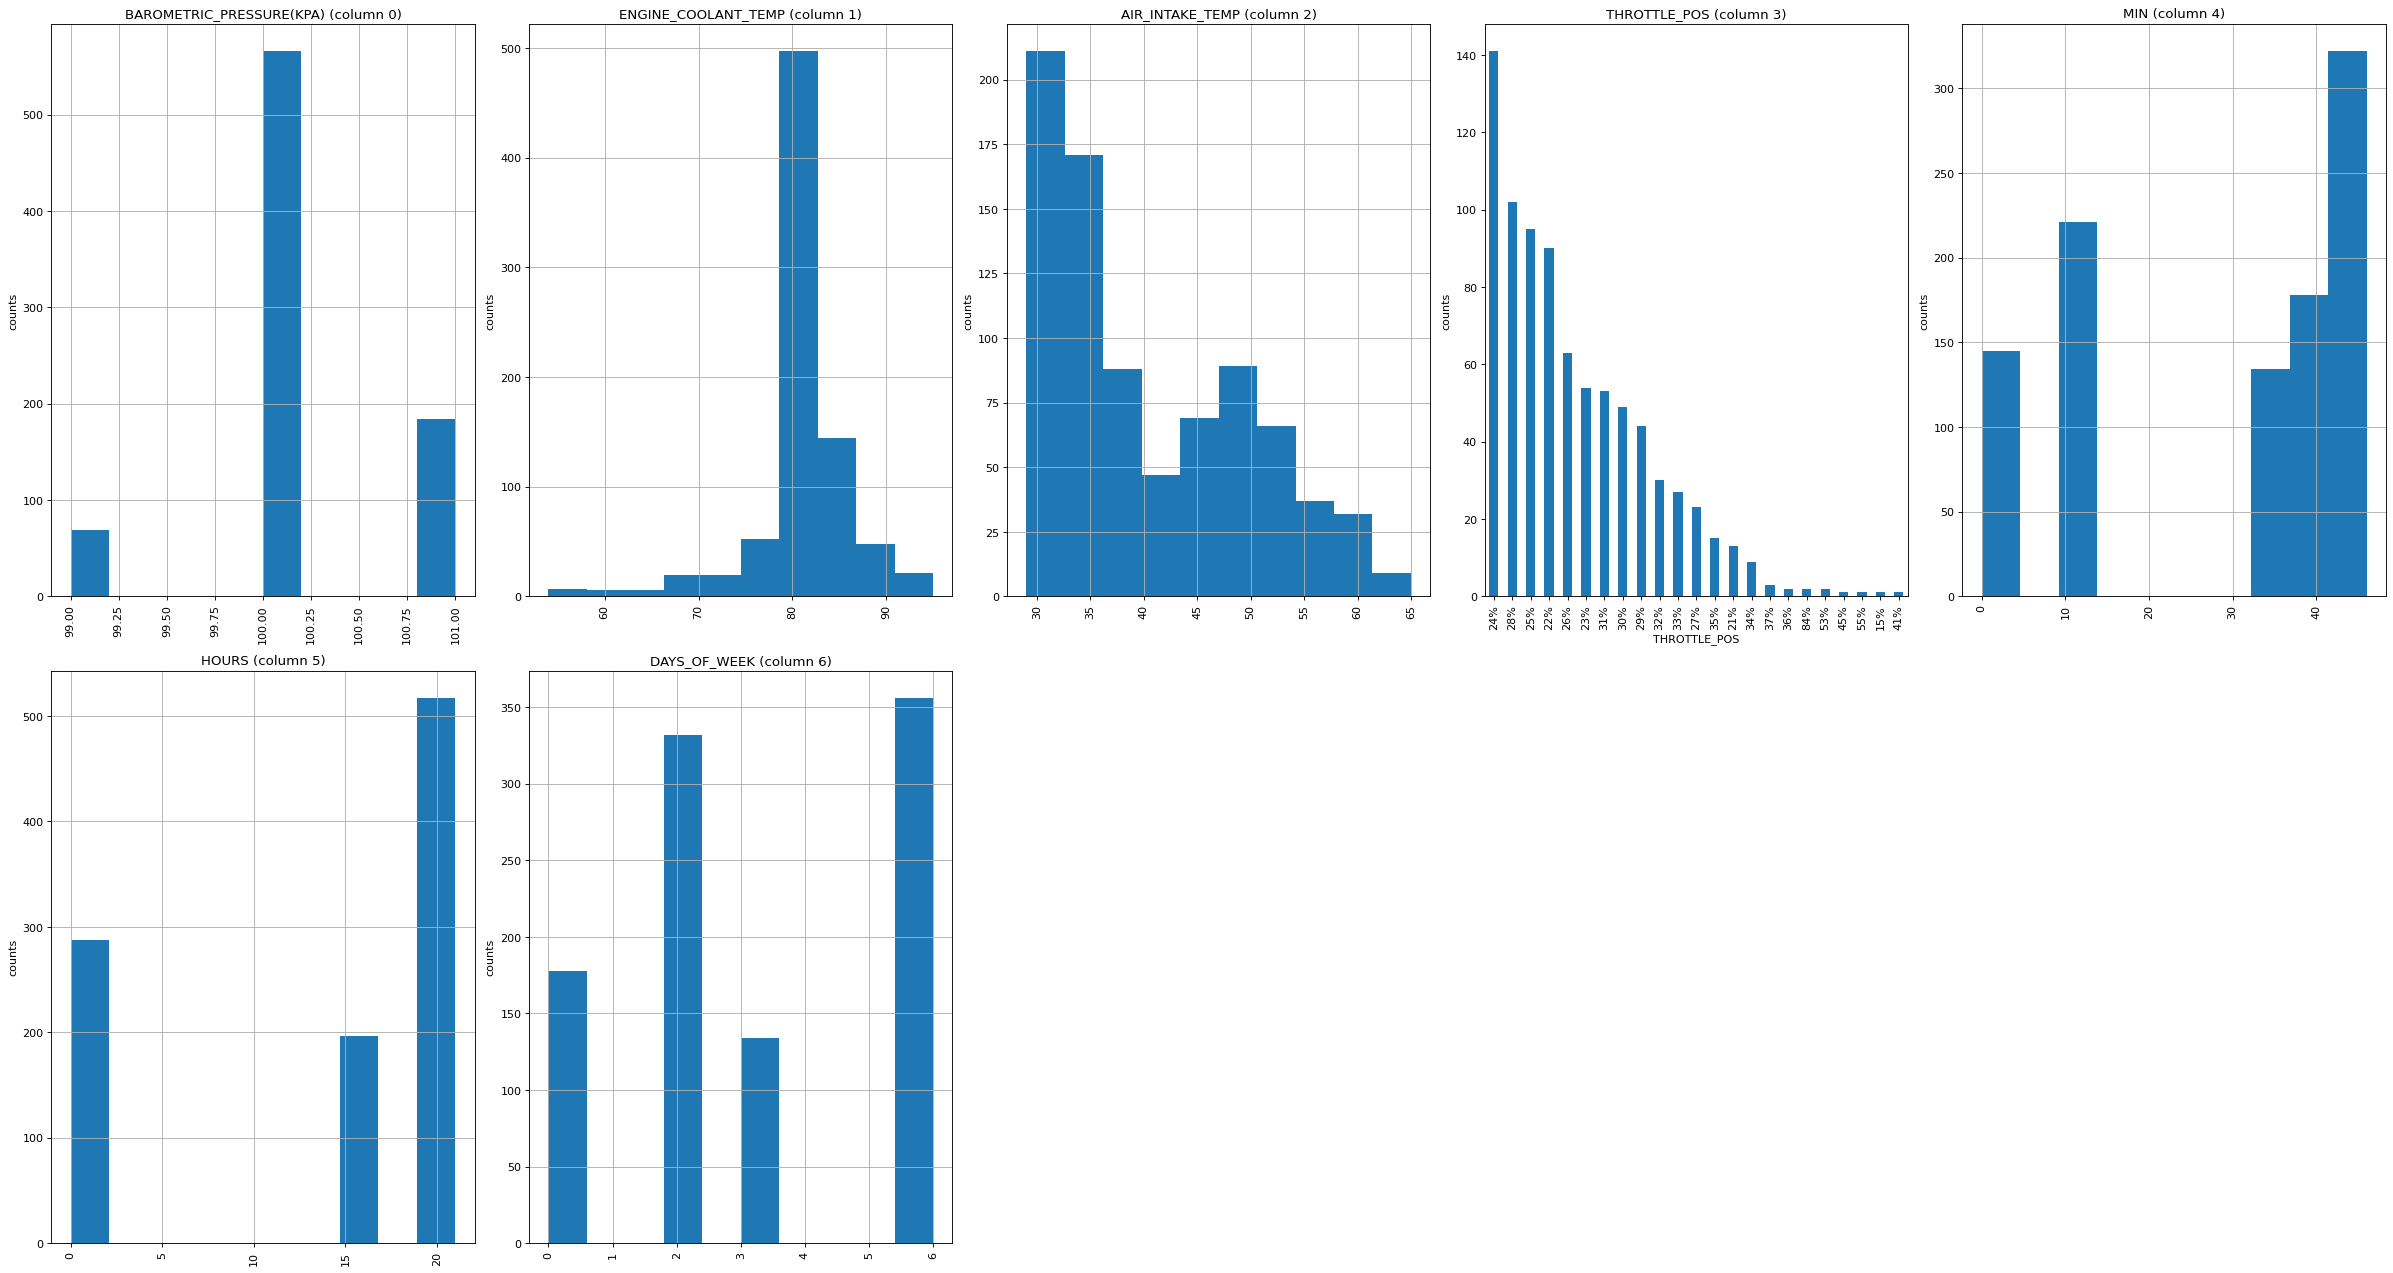

In [17]:
plotPerColumnDistribution(df_without_na, 10, 5)

Correlation matrix:

In [19]:
df = df1.dropna()

In [21]:
df1.shape

(1000, 33)

In [23]:
plotCorrelationMatrix(df_without_na, 8)

AttributeError: 'DataFrame' object has no attribute 'dataframeName'

Scatter and density plots:

In [13]:
plotScatterMatrix(df1, 20, 10)

TypeError: DataFrame.dropna() takes 1 positional argument but 2 were given

### Let's check 2nd file: /kaggle/input/exp2_19drivers_1car_1route.csv

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# exp2_19drivers_1car_1route.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/kaggle/input/exp2_19drivers_1car_1route.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'exp2_19drivers_1car_1route.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

Let's take a quick look at what the data looks like:

In [ ]:
df2.head(5)

Distribution graphs (histogram/bar graph) of sampled columns:

In [ ]:
plotPerColumnDistribution(df2, 10, 5)

Correlation matrix:

In [ ]:
plotCorrelationMatrix(df2, 8)

Scatter and density plots:

In [ ]:
plotScatterMatrix(df2, 6, 15)

### Let's check 3rd file: /kaggle/input/exp3_4drivers_1car_1route.csv

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# exp3_4drivers_1car_1route.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/kaggle/input/exp3_4drivers_1car_1route.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'exp3_4drivers_1car_1route.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

Let's take a quick look at what the data looks like:

In [ ]:
df3.head(5)

Distribution graphs (histogram/bar graph) of sampled columns:

In [ ]:
plotPerColumnDistribution(df3, 10, 5)

Correlation matrix:

In [ ]:
plotCorrelationMatrix(df3, 8)

Scatter and density plots:

In [ ]:
plotScatterMatrix(df3, 20, 10)

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Edit Notebook" button at the top of the kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!